In [47]:
%matplotlib inline

from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np

# Download dataset

Download MNIST dataset from Keras module.

In [60]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# show info
size_train, ximg_tr, yimg_tr = x_train.shape
size_test, ximg_ts, yimg_ts = x_test.shape
print('Train data contains {} examples of ({},{}) pixels'.format(size_train, ximg_tr, yimg_tr))
print('Test data contains {} examples of ({},{}) pixels'.format(size_test, ximg_ts, yimg_ts))

Train data contains 60000 examples of (28,28) pixels
Test data contains 10000 examples of (28,28) pixels


# Plot data

Plot 16 examples of the images in the dataset, where each example is 28x28 pixels.

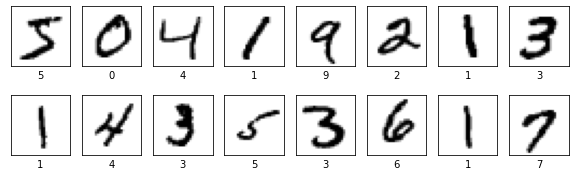

In [49]:
plt.figure(figsize=(10,3))
for i in range(0, 16):
    plt.subplot(2, 8, i+1) #rows, columns
    plt.imshow(x_train[i], cmap='binary')
    plt.xlabel(str(y_train[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [50]:
def show_number(img):
    for line in img:
        str_line = ''
        for cell in line:
            str_line += str(cell).zfill(3)+' '
        print(str_line)
    
print('Array of x_train[0]')
show_number(x_train[0])

Array of x_train[0]
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 003 018 018 018 126 136 175 026 166 255 247 127 000 000 000 000 
000 000 000 000 000 000 000 000 030 036 094 154 170 253 253 253 253 253 225 172 253 242 195 064 000 000 000 000 
000 000 000 000 000 000 000 049 238 253 253 253 253 253 253 253 253 251 093 082 082 056 039 000 000 000 000 000 
000 000 000 000 000 000 000 018 219 253 253 253 253 253 198 182 247 241 000 

# Normalize Dataset

We normalize the dataset in order to achieve a better convergence in training. 

In [61]:
# Reshape dataset
x_train = np.reshape(x_train, (size_train, ximg_tr * yimg_tr))
x_test = np.reshape(x_test, (size_test, ximg_ts * yimg_ts))

# Normalize data (change the range from 0-255 to 0-1)
x_train = x_train / 255.
x_test = x_test / 255.

print('New shape of training images: {}'.format(x_train.shape))
print('New shape of testing images: {}'.format(x_test.shape))
print('Excerpt of the normalized vectors: {}'.format(x_train[0][203:207]))

New shape of training images: (60000, 784)
New shape of testing images: (10000, 784)
Excerpt of the normalized vectors: [0.19215686 0.93333333 0.99215686 0.99215686]


# Create a Model

We create a model containing two hidden layers and one output layer. In each hidden layer, we use 32 hidden units (or nodes). We use Sigmoid as activation function since it contains values between zero and one, while the commonly used ReLU would keep values between zero and the maximum value achieved. Since we want to visualize the output, it is better to keep our values between zero and one. We could use ReLU and normalize before the visualization, but in order to keep it simple, we use Sigmoid here. As usual, we keep the last layer with the size of our classes, activated by softmax to have a probability distribution over the classes.

We use `sparce_categorical_crossentropy` as the loss function instead of `categorical_crossentropy` because we do not want hot encode our labels. So, we do not need to worry about create one-hot encoding for our labels. 
We use Adam optimizer, but we could use any other optimizer. Finally, we use `accuracy` as metric instead of the loss.

In [52]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='sigmoid', input_shape=(784,)),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


# Train the Model

Now, we train the model using our test set as validation set for 20 epochs with a batch size containing 2048 images. We use such high batch size because images are very little. 

In [63]:
model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20, batch_size=1024,
    verbose=2
)

Epoch 1/20
59/59 - 1s - loss: 0.3496 - accuracy: 0.9164 - val_loss: 0.3319 - val_accuracy: 0.9190
Epoch 2/20
59/59 - 0s - loss: 0.3227 - accuracy: 0.9209 - val_loss: 0.3086 - val_accuracy: 0.9234
Epoch 3/20
59/59 - 0s - loss: 0.3010 - accuracy: 0.9250 - val_loss: 0.2917 - val_accuracy: 0.9259
Epoch 4/20
59/59 - 1s - loss: 0.2832 - accuracy: 0.9281 - val_loss: 0.2761 - val_accuracy: 0.9301
Epoch 5/20
59/59 - 0s - loss: 0.2679 - accuracy: 0.9307 - val_loss: 0.2631 - val_accuracy: 0.9332
Epoch 6/20
59/59 - 0s - loss: 0.2549 - accuracy: 0.9338 - val_loss: 0.2513 - val_accuracy: 0.9337
Epoch 7/20
59/59 - 0s - loss: 0.2438 - accuracy: 0.9356 - val_loss: 0.2417 - val_accuracy: 0.9352
Epoch 8/20
59/59 - 0s - loss: 0.2335 - accuracy: 0.9380 - val_loss: 0.2327 - val_accuracy: 0.9382
Epoch 9/20
59/59 - 1s - loss: 0.2245 - accuracy: 0.9400 - val_loss: 0.2247 - val_accuracy: 0.9392
Epoch 10/20
59/59 - 1s - loss: 0.2163 - accuracy: 0.9419 - val_loss: 0.2177 - val_accuracy: 0.9400
Epoch 11/20
59/59 -

# Save the Model

In [64]:
model.save('model.h5')

# Create the ML Server

This first script creates our initial server in order to check if Flask is running OK. In this script, `%%writefile` stores all the content of the cell into a file named `ml_server.py`. In this server, we call Flask and whenever the route is called, it calls `index()`.

In [65]:
%%writefile ml_server.py

import json
import tensorflow as tf
import numpy as np
import random

from flask import Flask, request

app = Flask(__name__)

@app.route('/')
def index():
    return 'Welcome to the model server!'

if __name__ == '__main__':
    app.run()

Writing ml_server.py


Now, we can improve the script adding the model loading and the prediction. We return a json using the Flask server containing the layers of the model during prediction and the input image.

In [68]:
%%writefile ml_server.py

import json
import tensorflow as tf
import numpy as np
import random

from flask import Flask, request

app = Flask(__name__)

model = tf.keras.models.load_model('model.h5')
feature_model = tf.keras.models.Model(
    model.inputs, #input of the feature_model
    [layer.output for layer in model.layers] # get the list of outputs for all layers
)

# Load the test images 
_, (x_test, _) = tf.keras.datasets.mnist.load_data()
x_test = x_test / 255.

def get_prediction():
    index = np.random.choice(x_test.shape[0])
    image = x_test[index, :, :]
    image_arr = np.reshape(image, (1, 784))
    return feature_model.predict(image_arr), image

@app.route('/', methods=['GET', 'POST'])
def index():
    if request.method == 'POST':
        preds, image = get_prediction()
        # restruct the predictions to list, so we can return a json object from lists
        final_preds = [p.to_list() for p in preds]
        return json.dumps({
            'predictions': final_preds,
            'image': image.to_list()
        })
    return 'Welcome to the model server!'

if __name__ == '__main__':
    app.run()

Overwriting ml_server.py


# Streamlit Web App

After generating this code, we can run the `app.py` file using:

```shell
$ streamlit run app.py
```

In [16]:
%%writefile app.py

import streamlit as st
import json
import requests
import matplotlib.pyplot as plt
import numpy as np

URI = 'http://127.0.0.1:5000/'

st.title('Neural Network Visualizer')
st.sidebar.markdown('## Input image')

if st.button('Get random prediction'):
    response = requests.post(URI, data={})
    response = json.loads(response.text)
    preds = response.get('predictions')
    image = response.get('image')
    image = np.reshape(image, (28,28))

    st.sidebar.image(image, width=150)
    
    for layer, p in enumerate(preds):
        numbers = np.squeeze(np.array(p))
        plt.figure(figsize=(32,4))
        if layer == 2:
            row = 1
            col = 10
        else:
            row = 2
            col = 16

        for i, number in enumerate(numbers):
            plt.subplot(row, col, i+1)
            plt.imshow(number * np.ones((8, 8, 3)).astype('float32'))
            plt.xticks([])
            plt.yticks([])
            if layer == 2:
                plt.xlabel(str(i), fontsize=40)
                
        plt.subplots_adjust(wspace=0.05, hspace=0.05)
        plt.tight_layout()
        st.text('Layer {}'.format(layer + 1))
        st.pyplot()

Overwriting app.py
